<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_Stacking_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arash Akhavi
# GSB 545 Stacking Activity
# 4/13/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/abalonedata.csv", 
                    header = None, 
                    names = (["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings" ]))
data = pd.get_dummies(data, columns=['sex'])
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [ ]:
# define dataset
y = data.rings
x = data[["sex_F", "sex_I", "sex_M", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight"]]
print(x.shape, y.shape)

(4177, 10) (4177,)


In [ ]:
# get models
#def get_models():
#	models = dict()
#	models['knn'] = KNeighborsRegressor()
#	models['cart'] = DecisionTreeRegressor()
#	models['svm'] = SVR()
#	return models

In [ ]:
# evaluate models using cross validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
# get the models to evaluate
models = get_models()

In [ ]:
# evaluate the models and store results
#for name, model in models.items():
#	scores = evaluate_model(model, x, y)
#	results.append(scores)
#	names.append(name)
#	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -1.574 (0.071)
>cart -2.095 (0.121)
>svm -1.534 (0.085)


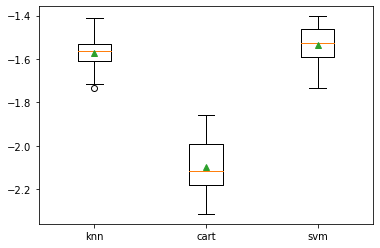

In [ ]:
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
# get a list of models to evaluate
# we expect the stacking model to perform better than all the previous models
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

In [ ]:
# evaluate models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -1.574 (0.071)
>cart -2.094 (0.106)
>stacking -1.531 (0.071)


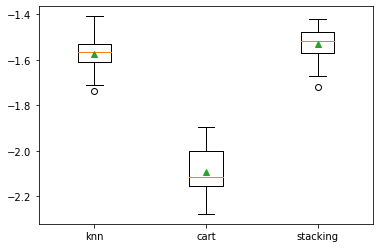

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Stacking did out perform the other models in terms of metrics. This does make sense based on what we know about stacking and how the Meta model is better than the Level-0 model.